## Train Model

In [36]:
import pandas as pd

df = pd.read_csv("iot_dataset.csv")
df.head()

,timestamp,client_id,topic,temp,humidity,message_rate,is_attack
0,2026-02-05 18:34:35,esp8266_node-db1b,iot/system/restart,110.20,61.88,179,1
1,2026-02-05 18:34:37,edge_gateway_01-192.168.0.193,iot/factory/line1/sensor01/humidity,20.48,68.76,3,0
2,2026-02-05 18:34:41,plc_line2-192.168.1.254,iot/factory/line2/sensor02/temp,31.04,63.62,6,0
3,2026-02-05 18:34:45,sensor_temp_01-f644,iot/factory/line1/sensor01/temp,32.48,62.34,2,0
4,2026-02-05 18:34:48,plc_line2-192.168.7.52,iot/factory/line2/sensor02/humidity,22.00,36.66,9,0


In [37]:
features = ["temp", "humidity", "message_rate"]
X = df[features]

In [42]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.35,   # ใกล้ % attack ใน dataset
    random_state=42
)

model.fit(X)

IsolationForest(contamination=0.35, random_state=42)

In [43]:
df["anomaly_prediction"] = model.predict(X)

# แปลงให้ anomaly = 1, normal = 0
df["anomaly_prediction"] = df["anomaly_prediction"].map({1: 0, -1: 1})

df.to_csv("iot_train_result.csv", index=False)

In [44]:
y_true = df["is_attack"]
y_pred = df["anomaly_prediction"]

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

#[[TN FP]
#[FN TP]]


array([[6417,   85],
       [  83, 3415]])

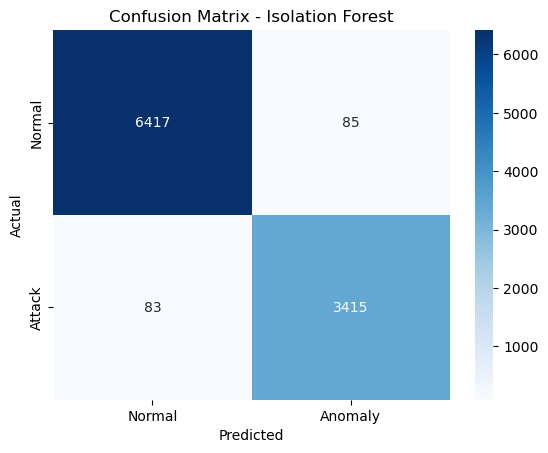

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Anomaly"],
    yticklabels=["Normal", "Attack"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()


In [47]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=["Normal", "Attack"]
))


              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      6502
      Attack       0.98      0.98      0.98      3498

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [49]:
import joblib

joblib.dump(model, "anomaly_model.pkl")
print("Model saved")


Model saved
